# Markowitz Risk Equation for volatility calculation

#### This project aims to calculate the level of risk using 13 stocks from Ibovespa stock index. 

The Markowitz Risk Equation, derived from Harry Markowitz's modern portfolio theory, quantifies the risk or volatility of a portfolio. It is commonly represented by the portfolio's standard deviation, a measure of how much the returns fluctuate around the mean. The equation takes into account the weights of the individual assets in the portfolio, their respective standard deviations, and the correlations between them. A higher Markowitz Risk Equation value indicates a greater level of risk and uncertainty in the portfolio's performance. Investors use this equation to optimize portfolios by finding the ideal balance between risk and expected returns.

In [89]:
# library
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [90]:
# get the data for the companies chosen 
ticker_symbols = ["ABEV3.SA", "B3SA3.SA", "BBAS3.SA", "QUAL3.SA", "BRFS3.SA", "CRFB3.SA", "AZUL4.SA", "CYRE3.SA", "EMBR3.SA", "ELET3.SA", "VALE3.SA", "PETR3.SA",
"SQIA3.SA"]
historical_data = {}

for symbol in ticker_symbols:
    ticker = yf.Ticker(symbol)
    historical_data[symbol] = ticker.history(period="2y")

In [91]:
ticker_symbols

['ABEV3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'QUAL3.SA',
 'BRFS3.SA',
 'CRFB3.SA',
 'AZUL4.SA',
 'CYRE3.SA',
 'EMBR3.SA',
 'ELET3.SA',
 'VALE3.SA',
 'PETR3.SA',
 'SQIA3.SA']

In [92]:
for symbol, data in historical_data.items():
    print("Ticker Symbol:", symbol)
    print(data)

Ticker Symbol: ABEV3.SA
                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2021-06-14  17.398497  17.828201  17.361925  17.809916  22185300        0.0   
2021-06-15  17.782490  17.782490  17.489923  17.489923  12469400        0.0   
2021-06-16  17.499065  17.691062  17.371068  17.453352  36205000        0.0   
2021-06-17  17.471640  17.846489  17.206502  17.380213  22474800        0.0   
2021-06-18  17.297926  17.453352  17.041931  17.151644  27084500        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-06-06  14.460000  14.850000  14.410000  14.820000  38723100        0.0   
2023-06-07  14.890000  15.030000  14.650000  14.850000  29670300        0.0   
2023-06-09  14.920000  15.170000  14.890000  15.140000  27318300        0.0   
2023-06-12  15.140000  15.230000  14.930000  15.160000  23053500        0.0   
2023-06-14  15.260000  15.33

In [93]:
# creating a dataframe, but each ticker symbol's historical data needs to be in the form of a pandas DataFrame 
# with columns like 'Open', 'High', 'Low', 'Close', etc.
df = pd.concat(historical_data.values(), keys=historical_data.keys())
df.index.names = ['Ticker', 'Date']

In [94]:
df.head()

Open       High        Low      Close      Volume  \
Ticker   Date                                                                 
ABEV3.SA 2021-06-14  17.398497  17.828201  17.361925  17.809916  22185300.0   
         2021-06-15  17.782490  17.782490  17.489923  17.489923  12469400.0   
         2021-06-16  17.499065  17.691062  17.371068  17.453352  36205000.0   
         2021-06-17  17.471640  17.846489  17.206502  17.380213  22474800.0   
         2021-06-18  17.297926  17.453352  17.041931  17.151644  27084500.0   

                     Dividends  Stock Splits  
Ticker   Date                                 
ABEV3.SA 2021-06-14        0.0             0  
         2021-06-15        0.0             0  
         2021-06-16        0.0             0  
         2021-06-17        0.0             0  
         2021-06-18        0.0             0

In [95]:
df.tail()

Open       High        Low      Close    Volume  \
Ticker   Date                                                               
SQIA3.SA 2023-06-06  20.639999  21.049999  20.490000  20.820000  869000.0   
         2023-06-07  20.820000  21.190001  20.620001  21.040001  714900.0   
         2023-06-09  21.040001  21.559999  20.990000  21.400000  632300.0   
         2023-06-12  21.500000  21.900000  21.180000  21.559999  773500.0   
         2023-06-14  21.000000  21.620001  20.930000  21.530001  132100.0   

                     Dividends  Stock Splits  
Ticker   Date                                 
SQIA3.SA 2023-06-06        0.0             0  
         2023-06-07        0.0             0  
         2023-06-09        0.0             0  
         2023-06-12        0.0             0  
         2023-06-14        0.0             0

In [96]:
# Percentages of missing values if there is any
df.isna().sum().sort_values(ascending=False)

Open            2
High            2
Low             2
Close           2
Volume          2
Dividends       0
Stock Splits    0
dtype: int64

In [97]:
# This function will allow us to get descriptive stats for each stock
tickers = df.index.get_level_values(0).unique()  # Get unique tickers from the index

for ticker in tickers:
    ticker_data = df.loc[ticker]  
    descriptive_stats = ticker_data.describe()  
    print(f"Descriptive Statistics for Ticker {ticker}:")
    print(descriptive_stats)
    print("-----------------------")

Descriptive Statistics for Ticker ABEV3.SA:
             Open        High         Low       Close        Volume  \
count  499.000000  499.000000  499.000000  499.000000  4.990000e+02   
mean    14.423839   14.606955   14.238555   14.418098  2.650815e+07   
std      0.930010    0.929593    0.913244    0.917565  1.348412e+07   
min     12.235323   12.472810   12.168827   12.377815  4.149300e+06   
25%     13.802737   14.017855   13.679243   13.821736  1.796490e+07   
50%     14.410000   14.581694   14.230000   14.401203  2.390430e+07   
75%     14.921838   15.066167   14.705186   14.876178  3.131310e+07   
max     17.782490   17.846489   17.489923   17.809916  1.366621e+08   

        Dividends  Stock Splits  
count  499.000000         499.0  
mean     0.002737           0.0  
std      0.043485           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max      0.762300           0.0  
----------

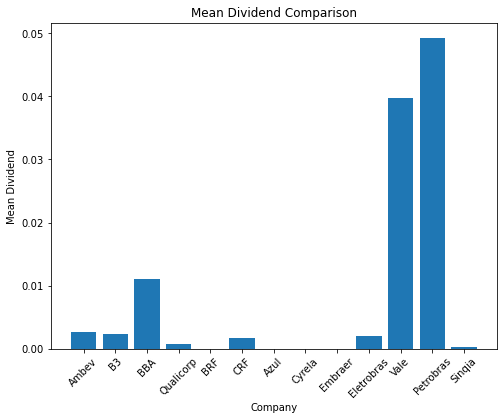

In [98]:
# Dividends daily average
Company = ['Ambev', 'B3', 'BBA', 'Qualicorp', 'BRF', 'CRF', 'Azul', 'Cyrela', 'Embraer', 'Eletrobras', 'Vale', 'Petrobras',
      'Sinqia']
mean_div = [0.002743, 0.002387, 0.011122, 0.000797, 0, 0.001680, 0, 0, 0, 0.001997, 0.039755, 0.049192, 0.000245]

plt.figure(figsize=(8, 6)) 

plt.bar(Company, mean_div)
plt.xlabel('Company')
plt.ylabel('Mean Dividend')
plt.title('Mean Dividend Comparison')

plt.xticks(rotation=45)

plt.show()


In [99]:
# create a variable that is my total amount invested 
total_amount_invested = 2000000
each_stock = 153846.15

In [100]:
df['Investment_Quantity'] = each_stock / df.groupby('Ticker')['Close'].transform('first')

print(df)

                          Open       High        Low      Close      Volume  \
Ticker   Date                                                                 
ABEV3.SA 2021-06-14  17.398497  17.828201  17.361925  17.809916  22185300.0   
         2021-06-15  17.782490  17.782490  17.489923  17.489923  12469400.0   
         2021-06-16  17.499065  17.691062  17.371068  17.453352  36205000.0   
         2021-06-17  17.471640  17.846489  17.206502  17.380213  22474800.0   
         2021-06-18  17.297926  17.453352  17.041931  17.151644  27084500.0   
...                        ...        ...        ...        ...         ...   
SQIA3.SA 2023-06-06  20.639999  21.049999  20.490000  20.820000    869000.0   
         2023-06-07  20.820000  21.190001  20.620001  21.040001    714900.0   
         2023-06-09  21.040001  21.559999  20.990000  21.400000    632300.0   
         2023-06-12  21.500000  21.900000  21.180000  21.559999    773500.0   
         2023-06-14  21.000000  21.620001  20.930000

In [101]:
# create a column for total dividends received 
df['Div_received'] = df['Investment_Quantity'] * df['Dividends']
print(df)

                          Open       High        Low      Close      Volume  \
Ticker   Date                                                                 
ABEV3.SA 2021-06-14  17.398497  17.828201  17.361925  17.809916  22185300.0   
         2021-06-15  17.782490  17.782490  17.489923  17.489923  12469400.0   
         2021-06-16  17.499065  17.691062  17.371068  17.453352  36205000.0   
         2021-06-17  17.471640  17.846489  17.206502  17.380213  22474800.0   
         2021-06-18  17.297926  17.453352  17.041931  17.151644  27084500.0   
...                        ...        ...        ...        ...         ...   
SQIA3.SA 2023-06-06  20.639999  21.049999  20.490000  20.820000    869000.0   
         2023-06-07  20.820000  21.190001  20.620001  21.040001    714900.0   
         2023-06-09  21.040001  21.559999  20.990000  21.400000    632300.0   
         2023-06-12  21.500000  21.900000  21.180000  21.559999    773500.0   
         2023-06-14  21.000000  21.620001  20.930000

In [102]:
# Total dividends received until now
df['Div_received'].sum()

422493.6769757478

In [103]:
# this is the total amount invested initially = 2,000,000.00
total_portfolio_amount = 2000000

In [104]:
# calculate the current value of the investments, but first we need to calculate the last 'Close' value for each 'Ticker'
last_close = df.groupby('Ticker')['Close'].last()
print(last_close)

Ticker
ABEV3.SA    15.290000
B3SA3.SA    14.990000
BBAS3.SA    48.650002
QUAL3.SA     4.870000
BRFS3.SA     9.060000
CRFB3.SA    11.780000
AZUL4.SA    19.410000
CYRE3.SA    18.860001
EMBR3.SA    20.200001
ELET3.SA    38.840000
VALE3.SA    69.269997
PETR3.SA    33.330002
SQIA3.SA    21.530001
Name: Close, dtype: float64


In [105]:
# Reset the index to make 'Ticker' a column again
df = df.reset_index()
# Multiply 'Investment_Quantity' by the last 'Close' value for each 'Ticker'
df['Investment_Value'] = df['Investment_Quantity'] * df['Ticker'].map(last_close)
print(df)

        Ticker       Date       Open       High        Low      Close  \
0     ABEV3.SA 2021-06-14  17.398497  17.828201  17.361925  17.809916   
1     ABEV3.SA 2021-06-15  17.782490  17.782490  17.489923  17.489923   
2     ABEV3.SA 2021-06-16  17.499065  17.691062  17.371068  17.453352   
3     ABEV3.SA 2021-06-17  17.471640  17.846489  17.206502  17.380213   
4     ABEV3.SA 2021-06-18  17.297926  17.453352  17.041931  17.151644   
...        ...        ...        ...        ...        ...        ...   
6484  SQIA3.SA 2023-06-06  20.639999  21.049999  20.490000  20.820000   
6485  SQIA3.SA 2023-06-07  20.820000  21.190001  20.620001  21.040001   
6486  SQIA3.SA 2023-06-09  21.040001  21.559999  20.990000  21.400000   
6487  SQIA3.SA 2023-06-12  21.500000  21.900000  21.180000  21.559999   
6488  SQIA3.SA 2023-06-14  21.000000  21.620001  20.930000  21.530001   

          Volume  Dividends  Stock Splits  Investment_Quantity  Div_received  \
0     22185300.0        0.0             0  

In [106]:
#calculate the sum invested for each stock
last_investment_value = df.groupby('Ticker')['Investment_Value'].last()
investment_sum = last_investment_value.groupby('Ticker').sum()
print(investment_sum)

Ticker
ABEV3.SA    132078.539171
AZUL4.SA     62602.802941
B3SA3.SA    154767.399879
BBAS3.SA    245584.608832
BRFS3.SA     47636.574595
CRFB3.SA     84210.915677
CYRE3.SA    126132.278721
ELET3.SA    135317.058683
EMBR3.SA    147493.706331
PETR3.SA    398129.921821
QUAL3.SA     27688.670024
SQIA3.SA    148485.938482
VALE3.SA    118153.897440
Name: Investment_Value, dtype: float64


In [107]:
import locale

# Set the locale to Br
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
investment_sum_brl = investment_sum.map(lambda x: locale.currency(x, grouping=True))
print(investment_sum_brl)

Ticker
ABEV3.SA    R$ 132.078,54
AZUL4.SA     R$ 62.602,80
B3SA3.SA    R$ 154.767,40
BBAS3.SA    R$ 245.584,61
BRFS3.SA     R$ 47.636,57
CRFB3.SA     R$ 84.210,92
CYRE3.SA    R$ 126.132,28
ELET3.SA    R$ 135.317,06
EMBR3.SA    R$ 147.493,71
PETR3.SA    R$ 398.129,92
QUAL3.SA     R$ 27.688,67
SQIA3.SA    R$ 148.485,94
VALE3.SA    R$ 118.153,90
Name: Investment_Value, dtype: object


In [108]:
# Remove currency symbols and convert values
investment_sum_numeric = investment_sum_brl.str.replace('R\$', '').str.replace('.', '').str.replace(',', '.').astype(float)
investment_sum_brl_sum = investment_sum_numeric.sum()

print(investment_sum_brl_sum)

1828282.3199999998


C:\Users\andre\AppData\Local\Temp\ipykernel_14624\2131678494.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  investment_sum_numeric = investment_sum_brl.str.replace('R\$', '').str.replace('.', '').str.replace(',', '.').astype(float)
C:\Users\andre\AppData\Local\Temp\ipykernel_14624\2131678494.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  investment_sum_numeric = investment_sum_brl.str.replace('R\$', '').str.replace('.', '').str.replace(',', '.').astype(float)


In [109]:
PnL = investment_sum_brl_sum - total_portfolio_amount
print(PnL)
# There is a loss of BRL 174.913,57 for this portfolio

-171717.68000000017


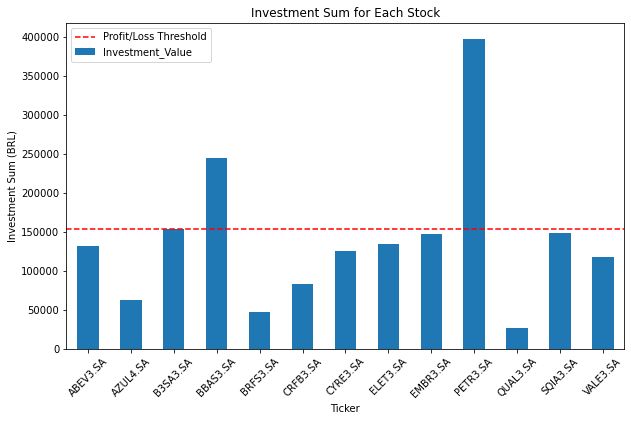

In [110]:
# Define the profit/loss threshold
threshold = 153840

# Plot the bar chart
plt.figure(figsize=(10, 6))
investment_sum.plot(kind='bar')
plt.axhline(threshold, color='r', linestyle='--', label='Profit/Loss Threshold')
plt.xlabel('Ticker')
plt.ylabel('Investment Sum (BRL)')
plt.title('Investment Sum for Each Stock')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The red line shows the PnL threshold for each stock. The portfolio total investment of BRL 2.000.000,00 was divided equally by each stock thus BRL 153,846.15. We can observe that PETR3.SA and BBAS3.SA have exceed, B3SA3.SA has matched, and the rest has underperformed. 

In [111]:
# Initial investment
df['Initial_investment'] = df['Investment_Quantity'] * df.groupby('Ticker')['Close'].transform('first')

print(df)

        Ticker       Date       Open       High        Low      Close  \
0     ABEV3.SA 2021-06-14  17.398497  17.828201  17.361925  17.809916   
1     ABEV3.SA 2021-06-15  17.782490  17.782490  17.489923  17.489923   
2     ABEV3.SA 2021-06-16  17.499065  17.691062  17.371068  17.453352   
3     ABEV3.SA 2021-06-17  17.471640  17.846489  17.206502  17.380213   
4     ABEV3.SA 2021-06-18  17.297926  17.453352  17.041931  17.151644   
...        ...        ...        ...        ...        ...        ...   
6484  SQIA3.SA 2023-06-06  20.639999  21.049999  20.490000  20.820000   
6485  SQIA3.SA 2023-06-07  20.820000  21.190001  20.620001  21.040001   
6486  SQIA3.SA 2023-06-09  21.040001  21.559999  20.990000  21.400000   
6487  SQIA3.SA 2023-06-12  21.500000  21.900000  21.180000  21.559999   
6488  SQIA3.SA 2023-06-14  21.000000  21.620001  20.930000  21.530001   

          Volume  Dividends  Stock Splits  Investment_Quantity  Div_received  \
0     22185300.0        0.0             0  

In [112]:
# create the difference between investment_value vs initial_investment
df['diff_current_vs_initial'] = df['Investment_Value'] - df['Initial_investment']
print(df)

        Ticker       Date       Open       High        Low      Close  \
0     ABEV3.SA 2021-06-14  17.398497  17.828201  17.361925  17.809916   
1     ABEV3.SA 2021-06-15  17.782490  17.782490  17.489923  17.489923   
2     ABEV3.SA 2021-06-16  17.499065  17.691062  17.371068  17.453352   
3     ABEV3.SA 2021-06-17  17.471640  17.846489  17.206502  17.380213   
4     ABEV3.SA 2021-06-18  17.297926  17.453352  17.041931  17.151644   
...        ...        ...        ...        ...        ...        ...   
6484  SQIA3.SA 2023-06-06  20.639999  21.049999  20.490000  20.820000   
6485  SQIA3.SA 2023-06-07  20.820000  21.190001  20.620001  21.040001   
6486  SQIA3.SA 2023-06-09  21.040001  21.559999  20.990000  21.400000   
6487  SQIA3.SA 2023-06-12  21.500000  21.900000  21.180000  21.559999   
6488  SQIA3.SA 2023-06-14  21.000000  21.620001  20.930000  21.530001   

          Volume  Dividends  Stock Splits  Investment_Quantity  Div_received  \
0     22185300.0        0.0             0  

In [113]:
# Calculate the holdong period return for each stock
df['HPR'] = (df['Div_received'] + df['diff_current_vs_initial']) / df['Initial_investment']
print(df)

        Ticker       Date       Open       High        Low      Close  \
0     ABEV3.SA 2021-06-14  17.398497  17.828201  17.361925  17.809916   
1     ABEV3.SA 2021-06-15  17.782490  17.782490  17.489923  17.489923   
2     ABEV3.SA 2021-06-16  17.499065  17.691062  17.371068  17.453352   
3     ABEV3.SA 2021-06-17  17.471640  17.846489  17.206502  17.380213   
4     ABEV3.SA 2021-06-18  17.297926  17.453352  17.041931  17.151644   
...        ...        ...        ...        ...        ...        ...   
6484  SQIA3.SA 2023-06-06  20.639999  21.049999  20.490000  20.820000   
6485  SQIA3.SA 2023-06-07  20.820000  21.190001  20.620001  21.040001   
6486  SQIA3.SA 2023-06-09  21.040001  21.559999  20.990000  21.400000   
6487  SQIA3.SA 2023-06-12  21.500000  21.900000  21.180000  21.559999   
6488  SQIA3.SA 2023-06-14  21.000000  21.620001  20.930000  21.530001   

          Volume  Dividends  Stock Splits  Investment_Quantity  Div_received  \
0     22185300.0        0.0             0  

In [114]:
# Calculate the standard deviation
std_deviations = df.groupby('Ticker')['Close'].std()
# Print the standard deviation for each stock
for ticker, std_dev in std_deviations.items():
    print(f"Stock: {ticker}, Std Deviation: {std_dev}")

Stock: ABEV3.SA, Std Deviation: 0.9175650767468412
Stock: AZUL4.SA, Std Deviation: 10.120990308850383
Stock: B3SA3.SA, Std Deviation: 1.4121225531420583
Stock: BBAS3.SA, Std Deviation: 5.402994059121674
Stock: BRFS3.SA, Std Deviation: 6.761922203604065
Stock: CRFB3.SA, Std Deviation: 3.1044695512019422
Stock: CYRE3.SA, Std Deviation: 2.55748356179709
Stock: ELET3.SA, Std Deviation: 5.1162034753872305
Stock: EMBR3.SA, Std Deviation: 3.839333777161645
Stock: PETR3.SA, Std Deviation: 5.265306111413251
Stock: QUAL3.SA, Std Deviation: 6.5570360569593085
Stock: SQIA3.SA, Std Deviation: 3.347155139634111
Stock: VALE3.SA, Std Deviation: 9.481916806045191


In [115]:
#calculate the sum of HPR
last_HPR = df.groupby('Ticker')['HPR'].last()
sum_HPR = last_HPR.groupby('Ticker').sum()
print(sum_HPR)

Ticker
ABEV3.SA   -0.141489
AZUL4.SA   -0.593082
B3SA3.SA    0.005988
BBAS3.SA    0.596300
BRFS3.SA   -0.690362
CRFB3.SA   -0.452629
CYRE3.SA   -0.180140
ELET3.SA   -0.120439
EMBR3.SA   -0.041291
PETR3.SA    1.587845
QUAL3.SA   -0.820024
SQIA3.SA   -0.034841
VALE3.SA   -0.232000
Name: HPR, dtype: float64


In [116]:
# create a new data frame
new_df = pd.DataFrame({'Sum_HPR': sum_HPR})
print(new_df)

           Sum_HPR
Ticker            
ABEV3.SA -0.141489
AZUL4.SA -0.593082
B3SA3.SA  0.005988
BBAS3.SA  0.596300
BRFS3.SA -0.690362
CRFB3.SA -0.452629
CYRE3.SA -0.180140
ELET3.SA -0.120439
EMBR3.SA -0.041291
PETR3.SA  1.587845
QUAL3.SA -0.820024
SQIA3.SA -0.034841
VALE3.SA -0.232000


In [117]:
# create the weight for the variables
new_df['weight'] = 0.0769230769230769
print(new_df)

           Sum_HPR    weight
Ticker                      
ABEV3.SA -0.141489  0.076923
AZUL4.SA -0.593082  0.076923
B3SA3.SA  0.005988  0.076923
BBAS3.SA  0.596300  0.076923
BRFS3.SA -0.690362  0.076923
CRFB3.SA -0.452629  0.076923
CYRE3.SA -0.180140  0.076923
ELET3.SA -0.120439  0.076923
EMBR3.SA -0.041291  0.076923
PETR3.SA  1.587845  0.076923
QUAL3.SA -0.820024  0.076923
SQIA3.SA -0.034841  0.076923
VALE3.SA -0.232000  0.076923


In [118]:
new_df['weighted_average'] = new_df['Sum_HPR'] * new_df['weight'] * 100
print(new_df)

           Sum_HPR    weight  weighted_average
Ticker                                        
ABEV3.SA -0.141489  0.076923         -1.088381
AZUL4.SA -0.593082  0.076923         -4.562167
B3SA3.SA  0.005988  0.076923          0.046062
BBAS3.SA  0.596300  0.076923          4.586923
BRFS3.SA -0.690362  0.076923         -5.310479
CRFB3.SA -0.452629  0.076923         -3.481762
CYRE3.SA -0.180140  0.076923         -1.385694
ELET3.SA -0.120439  0.076923         -0.926455
EMBR3.SA -0.041291  0.076923         -0.317622
PETR3.SA  1.587845  0.076923         12.214189
QUAL3.SA -0.820024  0.076923         -6.307874
SQIA3.SA -0.034841  0.076923         -0.268011
VALE3.SA -0.232000  0.076923         -1.784613


In [119]:
total_HPR = new_df['Sum_HPR'].sum() * 100
total_weight = new_df['weight'].sum() * 100
total_weighted_average = new_df['weighted_average'].sum()

print(total_HPR, total_weight, total_weighted_average)

-111.61646710227195 99.99999999999996 -8.585882084790148


In [120]:
new_df['weight_sqr'] = new_df['weight']**2
print(new_df)

           Sum_HPR    weight  weighted_average  weight_sqr
Ticker                                                    
ABEV3.SA -0.141489  0.076923         -1.088381    0.005917
AZUL4.SA -0.593082  0.076923         -4.562167    0.005917
B3SA3.SA  0.005988  0.076923          0.046062    0.005917
BBAS3.SA  0.596300  0.076923          4.586923    0.005917
BRFS3.SA -0.690362  0.076923         -5.310479    0.005917
CRFB3.SA -0.452629  0.076923         -3.481762    0.005917
CYRE3.SA -0.180140  0.076923         -1.385694    0.005917
ELET3.SA -0.120439  0.076923         -0.926455    0.005917
EMBR3.SA -0.041291  0.076923         -0.317622    0.005917
PETR3.SA  1.587845  0.076923         12.214189    0.005917
QUAL3.SA -0.820024  0.076923         -6.307874    0.005917
SQIA3.SA -0.034841  0.076923         -0.268011    0.005917
VALE3.SA -0.232000  0.076923         -1.784613    0.005917


In [121]:
# Add the standard deviation values to new_df
new_df['Std Deviation'] = std_deviations
print(new_df)

           Sum_HPR    weight  weighted_average  weight_sqr  Std Deviation
Ticker                                                                   
ABEV3.SA -0.141489  0.076923         -1.088381    0.005917       0.917565
AZUL4.SA -0.593082  0.076923         -4.562167    0.005917      10.120990
B3SA3.SA  0.005988  0.076923          0.046062    0.005917       1.412123
BBAS3.SA  0.596300  0.076923          4.586923    0.005917       5.402994
BRFS3.SA -0.690362  0.076923         -5.310479    0.005917       6.761922
CRFB3.SA -0.452629  0.076923         -3.481762    0.005917       3.104470
CYRE3.SA -0.180140  0.076923         -1.385694    0.005917       2.557484
ELET3.SA -0.120439  0.076923         -0.926455    0.005917       5.116203
EMBR3.SA -0.041291  0.076923         -0.317622    0.005917       3.839334
PETR3.SA  1.587845  0.076923         12.214189    0.005917       5.265306
QUAL3.SA -0.820024  0.076923         -6.307874    0.005917       6.557036
SQIA3.SA -0.034841  0.076923         -

In [122]:
# variance of HPR
# squared difference
squared_difference = (new_df['Sum_HPR'] - new_df['weighted_average'])**2
# Squared difference X weight squared
weighted_squared_difference = squared_difference * new_df['weight_sqr']
# Calculate the variance by summing up the weighted squared differences
portfolio_variance_sum_hpr = np.sum(weighted_squared_difference)

print(portfolio_variance_sum_hpr)

1.2472076742908926


In [123]:
# std deviation squared
new_df['std_dev_sqr'] = new_df['Std Deviation']**2
print(new_df)

           Sum_HPR    weight  weighted_average  weight_sqr  Std Deviation  \
Ticker                                                                      
ABEV3.SA -0.141489  0.076923         -1.088381    0.005917       0.917565   
AZUL4.SA -0.593082  0.076923         -4.562167    0.005917      10.120990   
B3SA3.SA  0.005988  0.076923          0.046062    0.005917       1.412123   
BBAS3.SA  0.596300  0.076923          4.586923    0.005917       5.402994   
BRFS3.SA -0.690362  0.076923         -5.310479    0.005917       6.761922   
CRFB3.SA -0.452629  0.076923         -3.481762    0.005917       3.104470   
CYRE3.SA -0.180140  0.076923         -1.385694    0.005917       2.557484   
ELET3.SA -0.120439  0.076923         -0.926455    0.005917       5.116203   
EMBR3.SA -0.041291  0.076923         -0.317622    0.005917       3.839334   
PETR3.SA  1.587845  0.076923         12.214189    0.005917       5.265306   
QUAL3.SA -0.820024  0.076923         -6.307874    0.005917       6.557036   

In [124]:
# get historical returns
returns_data = {}

for symbol, data in historical_data.items():
    data['Returns'] = data['Close'].pct_change()
    data = data.dropna()
    # Store the returns in the dictionary
    returns_data[symbol] = data['Returns']
    
returns_df = pd.DataFrame(returns_data)

In [125]:
# covariation matrix
cov_matrix = returns_df.cov()
print(cov_matrix)

          ABEV3.SA  B3SA3.SA  BBAS3.SA  QUAL3.SA  BRFS3.SA  CRFB3.SA  \
ABEV3.SA  0.000256  0.000172  0.000110  0.000152  0.000202  0.000119   
B3SA3.SA  0.000172  0.000708  0.000219  0.000460  0.000342  0.000244   
BBAS3.SA  0.000110  0.000219  0.000379  0.000227  0.000177  0.000117   
QUAL3.SA  0.000152  0.000460  0.000227  0.001380  0.000421  0.000264   
BRFS3.SA  0.000202  0.000342  0.000177  0.000421  0.001173  0.000246   
CRFB3.SA  0.000119  0.000244  0.000117  0.000264  0.000246  0.000545   
AZUL4.SA  0.000278  0.000629  0.000334  0.000655  0.000720  0.000379   
CYRE3.SA  0.000172  0.000492  0.000261  0.000573  0.000353  0.000282   
EMBR3.SA  0.000126  0.000216  0.000106  0.000210  0.000235  0.000130   
ELET3.SA  0.000130  0.000282  0.000204  0.000316  0.000230  0.000207   
VALE3.SA  0.000008  0.000065  0.000070  0.000061  0.000058  0.000097   
PETR3.SA  0.000087  0.000162  0.000243  0.000137  0.000161  0.000130   
SQIA3.SA  0.000152  0.000404  0.000155  0.000363  0.000308  0.00

In [126]:
weight_sqr = new_df['weight_sqr'].values
std_dev_sqr = new_df['std_dev_sqr'].values
cov_matrix = np.array(cov_matrix)  # Assuming cov_matrix is a 2D array or matrix

marko = np.dot(weight_sqr, std_dev_sqr) * cov_matrix
sum_marko = np.sum(marko)
sqrt_sum_marko = np.sqrt(sum_marko)*100
print(sqrt_sum_marko)

34.718636923303805


A Markowitz risk equation of 34.74% represents the risk or volatility associated with the portfolio constructed using the Markowitz portfolio optimization approach. In the context of Markowitz's modern portfolio theory, the risk equation is often expressed as the standard deviation or volatility of the portfolio.

A higher value of the Markowitz risk equation indicates a higher level of risk or volatility in the portfolio. It implies that the portfolio's returns are more likely to deviate from the expected returns, and there is a greater uncertainty in the performance of the portfolio.

Investors typically aim to find an optimal balance between risk and return by constructing portfolios that offer a favorable trade-off. Markowitz's approach helps in selecting an efficient portfolio that maximizes expected returns for a given level of risk or minimizes risk for a desired level of returns.

Therefore, a Markowitz risk equation of 34.74% suggests that the portfolio constructed using the Markowitz optimization has a relatively moderate level of risk. It's important to consider this risk metric alongside other factors such as expected returns, investment goals, risk tolerance, and diversification to make informed investment decisions.